In [2]:

# linear algebra
import numpy as np 
 # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


ModuleNotFoundError: No module named 'numpy'

In [ ]:
encoding = ['utf-8', 'latini', 'ISO-8859-1', 'cp1252']

file_path = 'combined_data.csv'
for encoding in encoding:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"file successfully read with encoding: {encoding}")
        #stopping the for loop
        break
    
    except UnicodeDecodeError:
         print(f"filed read with encoding: {encoding}")
        #the below part if for trying the next encoding, if the 
         continue
        
        
if 'df' in locals():
    print("csv file has successfully been loaded.")

    
else:
    print("csv file has failed to be loaded. Unable to read the csv file.")
    
  
    

file successfully read with encoding: utf-8
csv file has successfully been loaded.


In [ ]:
#to desplay 10 sample from the data set.
df.sample(10)

,label,text
15480,1,lower your monthly expenses with our reduce pr...
53,1,"hello ,\nhow are you ?\nfor top quality replic..."
46690,1,actvaton activatio activatin acivaion actiatio...
63230,0,author larry date fri jun escapenumber escapen...
43050,1,dear valued member we are sure that your healt...
49355,1,"hey ,\nall kinds of soft - ware available for ..."
3729,1,anatrim escapenumber the latest and most excit...
26268,1,home owners great options available for refi a...
6369,0,darren :\nit ' s that time again . please remo...
76094,0,is r not loading the packages at all like they...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
#renaming the columns0 of the dataset
# label to labels
#text to text
df.rename(columns={'label':'labels','text':'Texts'},inplace=True)
#show samples

df.sample(10)

,labels,Texts
15857,0,fyi\n- - - - - - - - - - - - - - - - - - - - -...
57405,1,your credit score doesn't matter to us if you ...
47248,0,but it did not work i was getting the below er...
21292,0,( see attached file : hplnl 123 . xls )\n- hpl...
17498,1,hi antelopehn you've just received a postcard ...
5539,0,alert name bush bush 'horrified' by virginia t...
69815,0,to all :\nthe attached memo summarizes our dis...
41181,0,on sat escapenumber escapenumber escapenumber ...
5283,0,"louise and marcus ,\nimmigration is status quo..."
77034,1,million making their happen product up dfcom t...


In [ ]:
df.duplicated().sum()
#to find the number of duplicate data in the dataset

0

In [ ]:
# if there is duplicated data in the dataset use the below code to remove one of the data
#df=df.drop_duplicate(keep='first')

In [ ]:
df.shape


(83448, 2)

In [ ]:
df.sample(30)

,labels,Texts
5109,1,"the original message was received at tue , 19 ..."
75927,0,jun escapenumber escapenumber escapenumber esc...
31600,1,couturier niobium bundle gu medusa superfluity...
17361,1,important symbol report http sescapenumber bil...
61439,0,here ' s that e - mail from northwest pipeline...
60805,1,downloadable software ds is a fast paced compa...
59979,0,at http samba sernet de ma bzr samba escapenum...
79384,0,> * * urgent notification : si server maintena...
81966,0,this is a multipart message in mime format pic...
41813,1,order confirmation . your order should be ship...


In [ ]:
print("Data exploration")

Data exploration


In [ ]:
df['labels'].value_counts()

labels
1    43910
0    39538
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x13d54f04e50>,
 [Text(-0.09042452969926633, 1.0962770655398508, 'spam'),
  Text(0.09042452969926644, -1.0962770655398508, 'ham')],
 [Text(-0.04932247074505435, 0.5979693084762823, '52.62'),
  Text(0.049322470745054414, -0.5979693084762823, '47.38')])

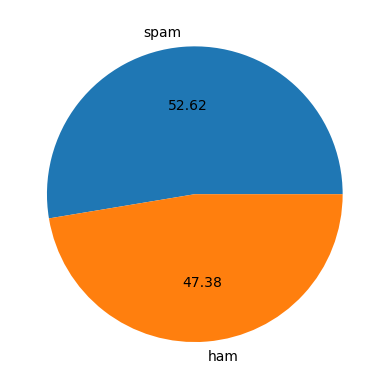

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['labels'].value_counts(),labels=['spam','ham'],autopct="%0.2f")

In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mobisafrankline\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['num_characters']=df['Texts'].apply(len)


In [ ]:
df.head()

,labels,Texts,num_characters
0,1,ounce feather bowl hummingbird opec moment ala...,148
1,1,wulvob get your medircations online qnb ikud v...,808
2,0,computer connection from cnn com wednesday es...,2235
3,1,university degree obtain a prosperous future m...,592
4,0,thanks for all your answers guys i know i shou...,1362


In [ ]:
#find the number of words in thmessage, a column of num_words will be created.
df['num_words'] = df['Texts'].apply(lambda x: len(nltk.word_tokenize(x)))


In [ ]:
df.head()

,labels,Texts,num_characters,num_words
0,1,ounce feather bowl hummingbird opec moment ala...,148,20
1,1,wulvob get your medircations online qnb ikud v...,808,104
2,0,computer connection from cnn com wednesday es...,2235,338
3,1,university degree obtain a prosperous future m...,592,76
4,0,thanks for all your answers guys i know i shou...,1362,223


In [ ]:
df['num_sentences']=df['Texts'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,labels,Texts,num_characters,num_words,num_sentences
0,1,ounce feather bowl hummingbird opec moment ala...,148,20,1
1,1,wulvob get your medircations online qnb ikud v...,808,104,1
2,0,computer connection from cnn com wednesday es...,2235,338,1
3,1,university degree obtain a prosperous future m...,592,76,1
4,0,thanks for all your answers guys i know i shou...,1362,223,1


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

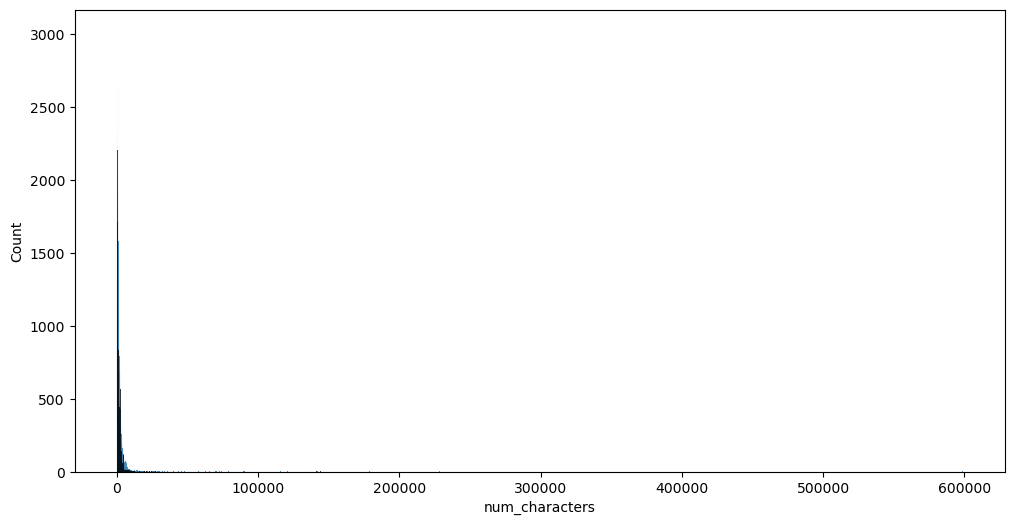

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['labels']==0]['num_characters'])
sns.histplot(df[df['labels']==1]['num_characters'],color='black')

C:\Users\Mobisafrankline\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


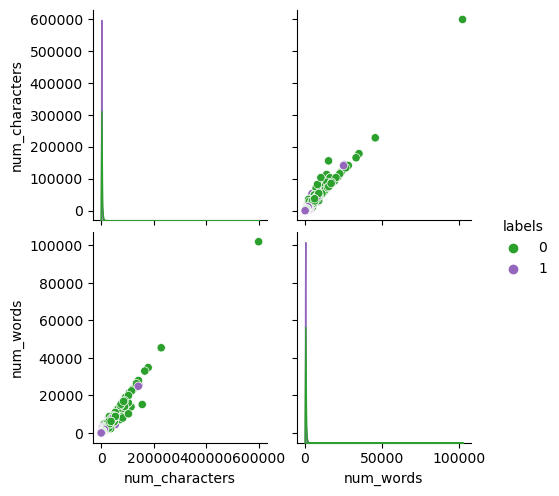

In [ ]:
colors = ['#2ca02c', '#9467bd']  
sns.pairplot(df, hue='labels', palette=colors)

# Show the plot
plt.show()

In [ ]:
#THE FOLLOWING LINE OF CODE IS FOR DATA PREPROCESSING.
print('THE FOLLOWING LINE OF CODE IS FOR DATA PREPROCESSING.')

THE FOLLOWING LINE OF CODE IS FOR DATA PREPROCESSING.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.chunk import RegexpParser
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Initialize the Porter Stemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
                
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)
    
transformed_text = transform_text("i am going home soon.")
print(transformed_text)


go home soon


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mobisafrankline\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mobisafrankline\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mobisafrankline\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#checking if the above 

In [ ]:
df['transformed_text'] = df["Texts"].apply(transform_text)

In [ ]:
df.head()


In [ ]:
!pip install wordcloud

from wordcloud import WordCloud


In [ ]:
df.describe()


In [ ]:
# Create WordCloud object with specified parameters
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [ ]:
# Generate word cloud for transformed text data with label 1
spam_wc = WordCloud().generate(df[df["labels"] == 1]["transformed_text"].str.cat(sep=" "))

# Plot the word cloud
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Generate word cloud for transformed text data with label 0
spam_wc = WordCloud().generate(df[df["labels"] == 0]["transformed_text"].str.cat(sep=" "))

# Plot the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(spam_wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
spam_corpus = []
for msg in df[df['labels'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

In [ ]:
from collctions import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus)most_common(30))[0],
            pd.DataFrame(Counter(spam_corpus)most_common(30))[1])
plt.xticks(rotaton = 'vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['labels'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
from collctions import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus)most_common(30))[0],
            pd.DataFrame(Counter(ham_corpus)most_common(30))[1])
plt.xticks(rotaton = 'vertical')
plt.show()

# # Build our model from the data above

In [ ]:
from sklarnfeature_extraction.text import CountVectorizer, TfidfVectorizer
cv =CountVectorizer()
tfidf = TfidfVectorizer(max_feature=4000)

In [ ]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
y = df['labels'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, range)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

In [ ]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

In [ ]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnd = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l2')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [ ]:
train_classifier(svc, X_train, y_train, X_test, y_test )

In [ ]:
# checking through the performnace of all the models we have used and its very much amusing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

# Create a Logistic Regression classifier with 'l2' penalty
# clf = LogisticRegression(penalty='l1')

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test )
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [ ]:
#create a dataframe to store and compare the accuracy and precision of the different algorithm
# Assuming clfs, accuracy_scores, and precision_scores are defined
performance_df = pd.DataFrame({'Algorithm': list(clfs.keys()), 'Accuracy': accuracy_scores, 'Precision': precision_scores})
performance_df = performance_df.sort_values('Precision', ascending=False)

In [ ]:
performance_df

In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

In [ ]:
#visualise this for a depper understanding
sns.catplot(x = 'Algorithm', y = 'value',
               hue = 'variable', data = performance_df1, kind = 'bar', height = 5, palette=colors)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores})
temp_df = temp_df.sort_values('Accuracy_max_ft_3000', ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df, on = 'Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm' :clfs.keys(), 'Accuracy_num_chars': accuracy_scores, 'Precision_num_chars': precision_scores}).sort_values('Accuracy_num_chars', ascending=False)

In [ ]:
new_df_scaled.merge(temp_df, on = 'Algorithm')

In [ ]:
# now I vote classify and save the model
svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [ ]:
voting.fit(X_train, y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

In [ ]:
#applying stacking
estimators = [('svm', svc), ('nb', etc)]
final_estimator = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [ ]:
#saving my model
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Sample text data with corresponding labels (replace with your actual data)
X_train = np.array(["Sample text 1", "Sample text 2", "Sample text 3"])
y_train = [0, 1, 0]  # 1 represents positive

# Convert X_train to a list
X_train_list = X_train.tolist()

# Create and train the TF-IDF vectorizer
tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train_list)

# Create and train the Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# Save the trained TF-IDF vectorizer and Naive Bayes model to files
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
    
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)